In [40]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sn
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import pickle
from ast import literal_eval
import sklearn
from scipy.special import expit
np.set_printoptions(formatter={'float': lambda x: "{0:0.5f}".format(x)})
from sklearn.metrics import classification_report

# 1. ROC Curve Visualization

In [12]:
le = preprocessing.LabelEncoder()
classes =  ['rosacea_inflammatory','rosacea_erythemato_telangiectasique','peri_oral_dermatitis',   'atopic_dermatitis', 
                'seborrheic_keratosis','psoriasis_vulgar','seborrheic_dermatitis','nummular_eczema',
                'tinea_versicolor','chronic_hand_eczema','vulgar_warts','folliculitis','alopecia_androgenic',
                'dyshidrosis','nevus','melasma','alopecia_areata','intertrigo','urticaria','vitiligo','keratosis_pilaris',
                'molluscum','cheilitis_eczematous','tinea_corporis','prurigo_nodularis','actinic_keratosis',
                'genital_warts','plane_warts','pityriasis_rosae','melanonychia','psoriasis_pustular_palmoplantar',
                'granuloma_annulare','psoriasis_guttate','lichen_simplex_chronicus','shingles','herpes_simplex', 'acne_scars',  'acne']


In [13]:
classes.sort()

In [14]:
le.fit(classes)

LabelEncoder()

In [15]:
df_result = pd.read_csv('bit-0-test_predictions.csv')
df_result.head()

,prob_acne,prob_acne_scars,prob_actinic_keratosis,prob_alopecia_androgenic,prob_alopecia_areata,prob_atopic_dermatitis,prob_cheilitis_eczematous,prob_chronic_hand_eczema,prob_dyshidrosis,prob_folliculitis,...,prob_tinea_corporis,prob_tinea_versicolor,prob_urticaria,prob_vitiligo,prob_vulgar_warts,filename,label_names,predicted_names,label,preds
0,0.000113,0.000011,0.000007,0.000031,0.002244,0.012465,0.000157,0.000045,0.000058,0.000560,...,0.000168,0.976413,0.000475,0.000290,0.000243,resized/9896/92034705A3/ailment_photos/AP-029f...,['atopic_dermatitis'],['tinea_versicolor'],[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,0.000006,0.000111,0.000012,0.000007,0.000017,0.898549,0.000218,0.000290,0.000006,0.000008,...,0.002303,0.000285,0.000401,0.000110,0.000020,resized/20460/2F6A3D0C70/ailment_photos/AP-7c3...,['atopic_dermatitis'],"['atopic_dermatitis', 'molluscum']",[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,0.991612,0.007325,0.000039,0.000606,0.000030,0.000077,0.000061,0.000006,0.000096,0.001022,...,0.000200,0.000005,0.000056,0.000140,0.000034,resized/16875/35A656697B/ailment_photos/AP-894...,['acne'],['acne'],[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,0.993163,0.063743,0.000112,0.000611,0.000018,0.000028,0.000031,0.000027,0.000136,0.000246,...,0.000034,0.000004,0.000068,0.000079,0.000010,resized/6452/946D5BD28C/ailment_photos/AP-f270...,['acne'],"['acne', 'acne_scars']",[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,0.317411,0.005725,0.000030,0.000036,0.002494,0.000032,0.000846,0.000037,0.000029,0.001239,...,0.000019,0.000023,0.000142,0.001682,0.000043,resized/5758/458C9A2D9C/ailment_photos/AP-638b...,['acne'],"['acne', 'rosacea_erythemato_telangiectasique'...",[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [16]:
df_result.shape[0]

1630

In [17]:
prob_columns = ['prob_acne','prob_acne_scars', 'prob_actinic_keratosis', 'prob_alopecia_androgenic',
       'prob_alopecia_areata', 'prob_atopic_dermatitis',
       'prob_cheilitis_eczematous', 'prob_chronic_hand_eczema',
       'prob_dyshidrosis', 'prob_folliculitis', 'prob_genital_warts',
       'prob_granuloma_annulare', 'prob_herpes_simplex', 'prob_intertrigo',
       'prob_keratosis_pilaris', 'prob_lichen_simplex_chronicus',
       'prob_melanonychia', 'prob_melasma', 'prob_molluscum', 'prob_nevus',
       'prob_nummular_eczema', 'prob_peri_oral_dermatitis',
       'prob_pityriasis_rosae', 'prob_plane_warts', 'prob_prurigo_nodularis',
       'prob_psoriasis_guttate', 'prob_psoriasis_pustular_palmoplantar',
       'prob_psoriasis_vulgar', 'prob_rosacea_erythemato_telangiectasique',
       'prob_rosacea_inflammatory', 'prob_seborrheic_dermatitis',
       'prob_seborrheic_keratosis', 'prob_shingles', 'prob_tinea_corporis',
       'prob_tinea_versicolor', 'prob_urticaria', 'prob_vitiligo',
       'prob_vulgar_warts']

In [18]:
y_score = df_result[prob_columns].to_numpy()
y_test = df_result['label'].str.replace(' ',',').apply(lambda x: np.array(eval(x)))
y_test = np.array([s for s in y_test ])

In [19]:
# Compute ROC curve and ROC area for each class
def compute_roc_curve(y_test, y_score, n_classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    return roc_auc, fpr, tpr

def plot_auc_score(y_test, y_score, n_classes):
    roc_auc, fpr, tpr = compute_roc_curve(y_test, y_score, n_classes)
    plt.figure(figsize=(10,10))
    lw = 2
    for i in range(n_classes):
        plt.plot(
            fpr[i],
            tpr[i],
            lw=lw,
            label="ROC curve (area = %0.2f)" % roc_auc[i],
        )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()

In [22]:
def plot_auc_curve(y_test, y_score, classes):
    roc_auc, fpr, tpr = compute_roc_curve(y_test, y_score, len(classes))
    f =plt.figure(figsize=(15,15))
    lw = 2
    for i in range(len(classes)):
        plt.plot(
            fpr[i],
            tpr[i],
            lw=lw,
            label=f"ROC curve {classes[i]} (area = {roc_auc[i]:.2f})"
        )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()

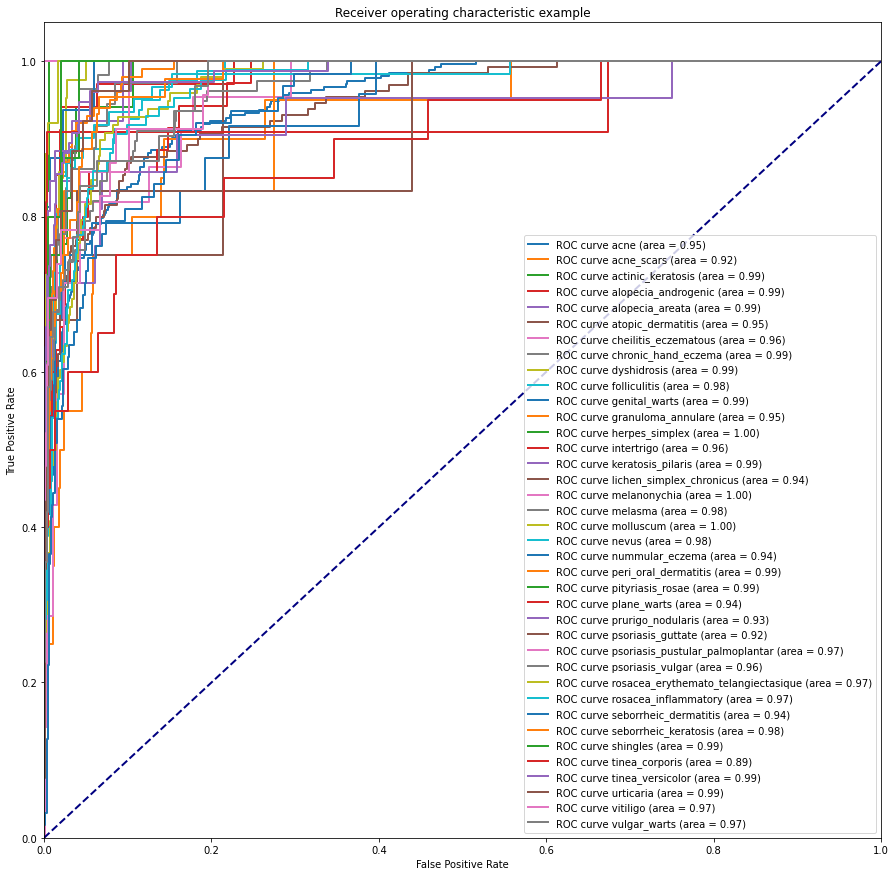

In [23]:
plot_auc_curve(y_test, y_score, le.classes_)

# 2. Multi-Label Confusion Matrices

In [167]:
def get_confusion_matrix(y_true, y_pred, label_encoder: sklearn.preprocessing, is_multi_label:bool=False, fontsize=20):
    """
    Visualizes confusion matrix.
    Args:
        y_true (list): list of labels
        y_pred (list): list of predicted values
        class_names_list (dict): classe anmes
    
    Returns:
        f (matplotlib.pyplot.figure): figure
    """    
    if is_multi_label:
        matrix = multilabel_confusion_matrix(y_true, y_pred)
        accs = compute_accuracy_per_disease(matrix, y_test, y_pred, label_encoder.classes_)
        num_classes = len(label_encoder.classes_)
        col = 5
        row= math.ceil(num_classes / col)
        fig_h = int(7 * row)
        f, ax = plt.subplots(row, col, figsize=(70,  fig_h))
        #plt.suptitle(f"Confusion Matrices", fontsize=fontsize)
        for axes, cfs_matrix, label, acc in zip(ax.flatten(), matrix , label_encoder.classes_, accs):
            print_confusion_matrix(cfs_matrix, axes, label, ["F", "T"], acc, fontsize=fontsize )
        
        plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    else:
        matrix = confusion_matrix(y_true, y_pred)
        index = label_encoder.classes_
        index_renamed = []
        for i in index:
            index_renamed.append(i.replace('acne_',''))
        df_cm = pd.DataFrame(matrix, index=index_renamed, columns=index_renamed)
        f = plt.figure()
        sn.heatmap(df_cm, annot=True)
        plt.title('Threshold')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
    plt.show()

In [168]:
def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, accuracy, fontsize=20):
    """Adapated FROM: https://stackoverflow.com/questions/62722416/plot-confusion-matrix-for-multilabel-classifcation-python
    """

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sn.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes,annot_kws={"size": fontsize},)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_ylabel('True label', fontsize=fontsize)
    axes.set_xlabel('Predicted label', fontsize=fontsize)
    axes.set_title(f"{class_label}: {accuracy:.2f}%", fontsize=fontsize )      

In [169]:
_, _, thresholds  = roc_curve(y_test.ravel(), y_score.ravel())

In [170]:
def get_predictions(prob, threshold):
    threshold_vectorized= np.vectorize((lambda x: 1 if x>threshold else 0))
    return threshold_vectorized(prob)


In [171]:
def compute_accuracy_per_disease(matrix, y_test, y_pred, classes):
    accs = []
    for i, disease in enumerate(classes):
        sub_matrix = matrix[i]
        total = np.sum(sub_matrix)
        diag = np.sum(np.diagonal(sub_matrix))
        accs.append(diag/total)
    return accs

The threshold is: 0.39 


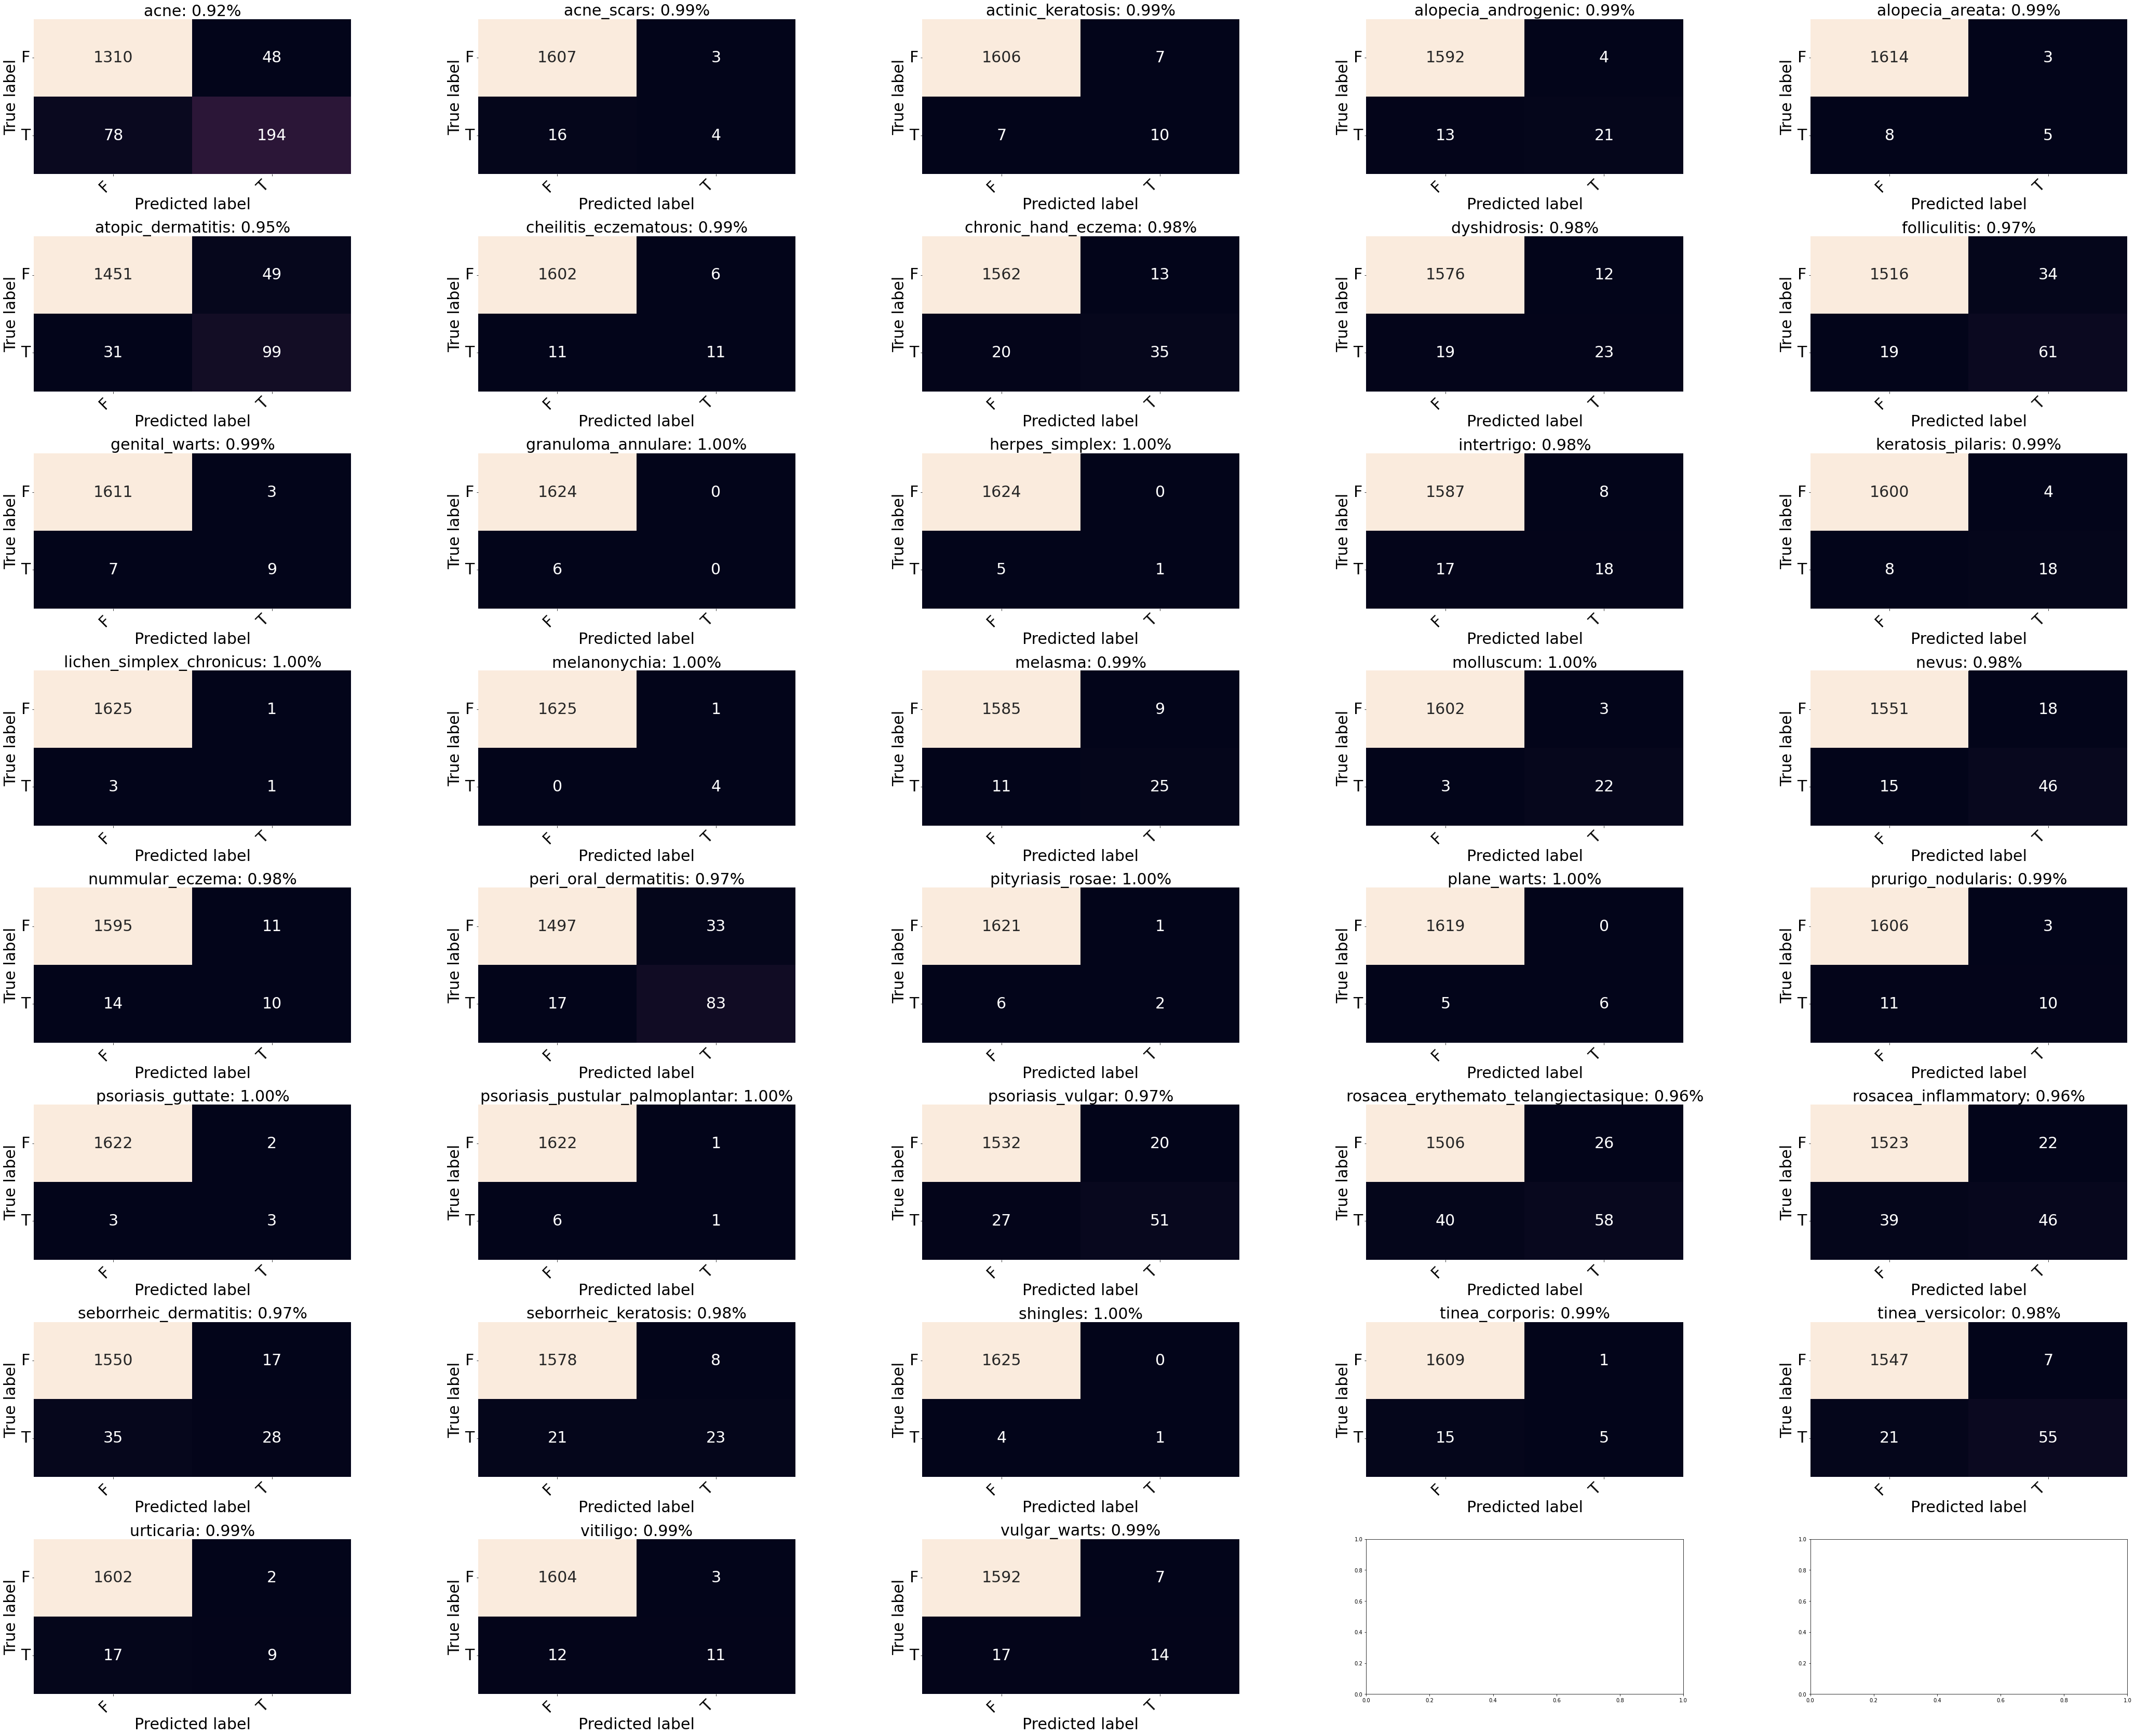

In [172]:

i = int(len(thresholds)/2)
t = 0.39
print(f'The threshold is: {t} ')
#print(f'The subset accuracy is: {accuracy_score(y_test, y_pred)}')
y_pred = get_predictions(y_score, t)
get_confusion_matrix(y_test, y_pred, label_encoder= le, is_multi_label=True, fontsize=30 )

In [ ]:
print(classification_report(y_test, y_pred, target_names=le.classes_))